<a href="https://colab.research.google.com/github/KESAVE8604-droid/kesaverdhen-hybrid-movie-recommender/blob/main/notebooks/Phase3_CollabFiltering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Phase 3 — Collaborative Filtering
Goal: Learn user–movie interactions from ratings.

Options:
1. Matrix Factorization (SVD) via surprise library.
2. Neural Collaborative Filtering (NCF) using TensorFlow or PyTorch.

Tasks:
• Train model on userId, movieId, rating.
• Predict unseen ratings using algo.predict(userId, movieId).
• Save trained CF model (collab_model.pkl).

Output:
Collaborative Filtering Model capable of rating predictions.


In [1]:
!pip install scikit-surprise


In [2]:
import numpy as np
print("✅ NumPy version:", np.__version__)

from surprise import Dataset, Reader, SVD
print("✅ Surprise library loaded successfully!")


✅ NumPy version: 1.26.4
✅ Surprise library loaded successfully!


scikit-surprise was compiled for NumPy 1.x and hasn’t been fully updated for NumPy 2.x yet.

Downgrade NumPy to Version 1.x
restart your runtime:

In [3]:
# Step 1 — Imports
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
import joblib


In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
#Step 2 — Load the Cleaned Dataset
# Load your cleaned dataset
path = "/content/drive/MyDrive/MovieRecommender/movielens_cleaned.csv"
ratings_df = pd.read_csv(path)

print("✅ Dataset loaded successfully!")
ratings_df.head()


✅ Dataset loaded successfully!


,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,Year,Clean_Title
0,1,1193,5,2000-12-31 22:12:40,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),['Drama'],1975,One Flew Over the Cuckoo's Nest
1,1,661,3,2000-12-31 22:35:09,F,1,10,48067,James and the Giant Peach (1996),"['Animation', ""Children's"", 'Musical']",1996,James and the Giant Peach
2,1,914,3,2000-12-31 22:32:48,F,1,10,48067,My Fair Lady (1964),"['Musical', 'Romance']",1964,My Fair Lady
3,1,3408,4,2000-12-31 22:04:35,F,1,10,48067,Erin Brockovich (2000),['Drama'],2000,Erin Brockovich
4,1,2355,5,2001-01-06 23:38:11,F,1,10,48067,"Bug's Life, A (1998)","['Animation', ""Children's"", 'Comedy']",1998,"Bug's Life, A"


In [7]:
#step-3 Prepare Data for Surprise Library
#Surprise library requires a specific data format.
# Define rating scale (MovieLens ratings are 1–5)
reader = Reader(rating_scale=(1, 5))

# Load dataset into Surprise format
data = Dataset.load_from_df(ratings_df[['UserID', 'MovieID', 'Rating']], reader)

# Split into train and test sets
trainset, testset = train_test_split(data, test_size=0.2)
print("✅ Data prepared for training!")



✅ Data prepared for training!


In [ ]:
#Step 4 — Train the SVD Model

SVD (Singular Value Decomposition) is a matrix factorization algorithm that learns latent features of users and movies.

In [8]:
# Initialize SVD model
model = SVD(n_factors=100, biased=True, random_state=42)

# Train the model
model.fit(trainset)

print("✅ Collaborative Filtering Model Trained (SVD)!")


✅ Collaborative Filtering Model Trained (SVD)!


In [9]:
#Step 5 — Evaluate the Model
# Predict on test set
predictions = model.test(testset)

# Calculate RMSE (Root Mean Square Error)
rmse = accuracy.rmse(predictions)
print("📊 Model RMSE:", rmse)


RMSE: 0.8746
📊 Model RMSE: 0.874628761062126


In [10]:
#Step 6 — Predict Unseen Ratings
# Predict rating for a specific user and movie
user_id = 1        # example user
movie_id = 1193    # example movie
pred = model.predict(user_id, movie_id)
print(f"Predicted rating for User {user_id} on Movie {movie_id}: {pred.est:.2f}")


Predicted rating for User 1 on Movie 1193: 4.42


In [11]:
# Save model to Drive
joblib.dump(model, "/content/drive/MyDrive/MovieRecommender/collab_model.pkl")

print("✅ Collaborative Filtering model saved as collab_model.pkl")


✅ Collaborative Filtering model saved as collab_model.pkl


In [12]:
#Phase 3 — Performance Metrics & Visualization
predictions = model.test(testset)


In [13]:
#Step 1 — Compute Key Metrics
from surprise import accuracy
import numpy as np

# RMSE (Root Mean Square Error)
rmse = accuracy.rmse(predictions)

# MAE (Mean Absolute Error)
mae = accuracy.mae(predictions)

# Optional: Compute MAPE manually
true_ratings = [pred.r_ui for pred in predictions]
pred_ratings = [pred.est for pred in predictions]
mape = np.mean(np.abs((np.array(true_ratings) - np.array(pred_ratings)) / np.array(true_ratings))) * 100

print("\n✅ Model Performance Metrics:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"MAPE: {mape:.2f}%")


RMSE: 0.8746
MAE:  0.6868

✅ Model Performance Metrics:
RMSE: 0.8746
MAE:  0.6868
MAPE: 26.38%


In [14]:
#Step 2 — Convert Predictions to a DataFrame
import pandas as pd

pred_df = pd.DataFrame(predictions, columns=["uid", "iid", "r_ui", "est", "details"])
pred_df.rename(columns={
    'uid': 'UserID',
    'iid': 'MovieID',
    'r_ui': 'ActualRating',
    'est': 'PredictedRating'
}, inplace=True)

pred_df.head()


,UserID,MovieID,ActualRating,PredictedRating,details
0,4591,2990,3.0,3.472035,{'was_impossible': False}
1,3778,2539,3.0,2.974274,{'was_impossible': False}
2,4575,3018,1.0,1.000000,{'was_impossible': False}
3,5576,3082,5.0,4.577403,{'was_impossible': False}
4,5112,2140,3.0,2.501936,{'was_impossible': False}


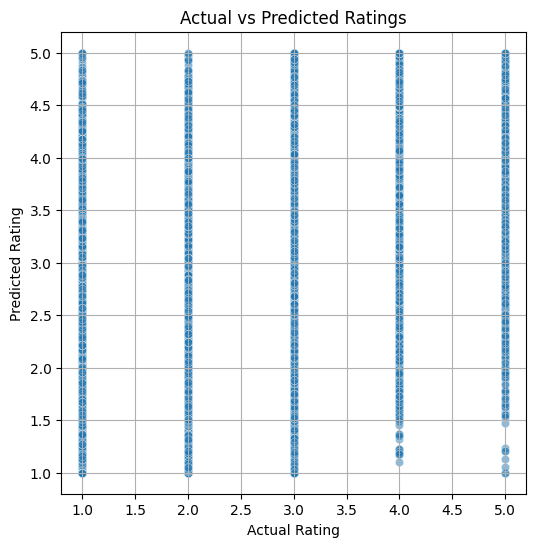

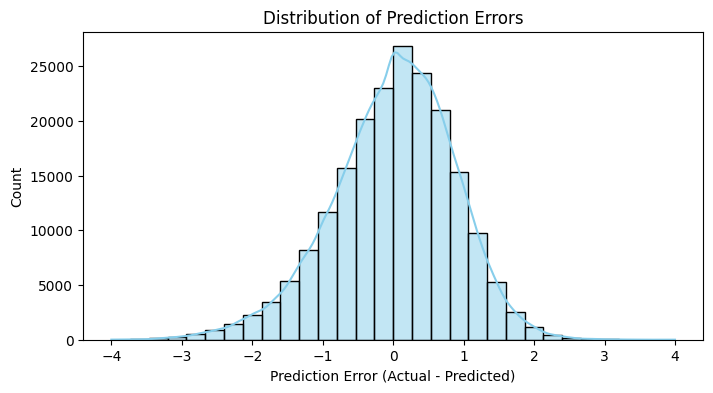

In [16]:
#Step 3 — Visualize Model Performance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.scatterplot(x='ActualRating', y='PredictedRating', data=pred_df, alpha=0.5)
plt.title('Actual vs Predicted Ratings')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.grid(True)
plt.show()

#2. Error Distribution Plot
pred_df['Error'] = pred_df['ActualRating'] - pred_df['PredictedRating']

plt.figure(figsize=(8,4))
sns.histplot(pred_df['Error'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error (Actual - Predicted)')
plt.ylabel('Count')
plt.show()


In [17]:
#Step 4 — Save Metrics for Report
metrics = {
    "RMSE": rmse,
    "MAE": mae,
    "MAPE": mape,
    "Num_Users": ratings_df['UserID'].nunique(),
    "Num_Movies": ratings_df['MovieID'].nunique()
}

metrics_df = pd.DataFrame([metrics])
metrics_df.to_csv("/content/drive/MyDrive/MovieRecommender/phase3_metrics.csv", index=False)
print("✅ Metrics saved to Drive: phase3_metrics.csv")


✅ Metrics saved to Drive: phase3_metrics.csv
